# <font color = "Indigo"><h3 align = "center">PROJECT </h3></font>

# Predicting the  amount of product purchase using  Mutiple  Linear Regression

## Importing the nescessary library files 
* <b>pandas</b> for data manipulation and analysis i.e, for reading the file.
* <b>numpy</b> for numerical functions.
* <b>matplot</b> for graphs and plotting.
* <b>seaborn</b> for graphs and plots.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

## Reading the file using pandas

In [3]:
product = pd.read_csv('train.csv')

In [4]:
product.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## <b>corr()</b> used to find the pairwise correlation of all columns in the DataFrame

In [5]:
product.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


## shape function gives the information on the number of rows and column in the dataset

In [6]:
product.shape

(550068, 12)

## To check the number of empty/NaN variables 

In [7]:
product.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Fills the empty values with the most repeated value using lambda function 

####  A lambda function is a small anonymous function. A lambda function can take any number of arguments, but can only have one expression. 
#### Index.value_counts() function returns object containing counts of unique values

In [8]:
train = product.fillna(0)
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

## Getting LabelEncoder from sklearn.preprocessing library
### LabelEncoder encode labels with value between 0 and n_classes-1.

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

### Coverting the string type into integer type using LabelEncoder

In [10]:
prod = train
prod.Gender = le.fit_transform(train.Gender)
prod.City_Category = le.fit_transform(train.City_Category)
prod.Age = le.fit_transform(train.Age)
prod.Stay_In_Current_City_Years = le.fit_transform(train.Stay_In_Current_City_Years)
prod.Product_ID = le.fit_transform(train.Product_ID)
prod.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,672,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,852,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,828,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,2734,1,6,16,2,4,0,8,0.0,0.0,7969


## Assigning input variables to x

In [11]:
x = prod.iloc[:,:-1]
x.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,672,0,0,10,0,2,0,3,0.0,0.0
1,1000001,2376,0,0,10,0,2,0,1,6.0,14.0
2,1000001,852,0,0,10,0,2,0,12,0.0,0.0
3,1000001,828,0,0,10,0,2,0,12,14.0,0.0
4,1000002,2734,1,6,16,2,4,0,8,0.0,0.0


## Assigning output variable to y

In [12]:
y = prod.iloc[:,-1]
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

## Importing train_test_split from sklearn.model_selection
### Splits the DataFrame in train and test dataset

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 0)

### Checking the number of columns in train and test data set

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(440054, 11)
(110014, 11)
(440054,)
(110014,)


##  LinearRegression is used to fit a LinearRegression model 


In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Predicting the output from the input test set

In [16]:
pred = reg.predict(x_test)
pred

array([10741.16298206,  5791.31736979, 11149.87283801, ...,
       12908.24134475, 11902.60637373, 10342.56906881])

## Calculating the mean of the predicted output values

In [17]:
a=np.mean(pred)
a

9261.132668719629

## Calculating the mean of the actual output

In [18]:
b=np.mean(y_test)
b

9269.135110076899

## Calculating the percentage mean error for the predicted and the actual output value 

In [19]:
diff = (abs(a-b)/b) * 100
print(" % error: ",diff)

 % error:  0.08633428321235985


## Calculating the variance of the mean of predicted and actual output value

In [20]:
print("Varience is : ",reg.score(x_test,y_test))

Varience is :  0.15656811112287783


## Calculating the R- Square value

In [29]:
print("R - squared value score ",r2_score(y_test,pred))

R - squared value score  0.15656811112287783


## Plotting the graph between the predicted and actual output value

### Using 'reg' type of graph

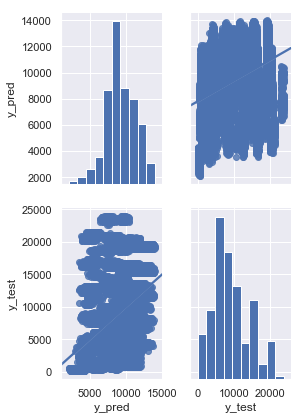

In [21]:
sns.set(style = 'darkgrid')
df = pd.DataFrame({'y_pred':pred, 'y_test':y_test})
sns.pairplot(df,height=3, aspect=0.7, kind='reg')

### Adding the palette

In [22]:
sns.set_palette('RdPu',1)

### Using the bar and scatter graph

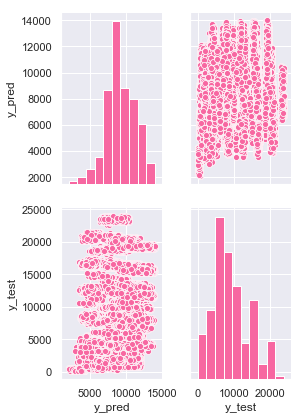

In [23]:
df = pd.DataFrame({'y_pred':pred, 'y_test':y_test})
sns.pairplot(df,height=3, aspect=0.7)